# Importar Librarias y datos

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   
import itertools

from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf 

In [21]:
df = pd.read_parquet("output_08.parquet")

In [23]:
df.head()

,age,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,gender_1.0,...,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged,income_above_limit_1.0
0,0.853333,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.00292,True,...,False,True,False,True,False,False,False,False,False,False
1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,True,...,True,True,False,True,False,False,True,False,True,False
2,0.080000,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.00000,False,...,True,True,False,True,False,False,True,False,True,False
4,0.733333,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,False,...,False,True,False,True,False,False,False,False,False,False
5,0.400000,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.00000,False,...,False,False,False,False,False,False,True,False,True,False


# Modelo Maching Learning Regresion Logistica 

In [26]:
df.shape

(159814, 46)

In [28]:
df.columns.values

array(['age', 'employment_stat', 'wage_per_hour', 'working_week_per_year',
       'occupation_code', 'total_employed', 'gains', 'losses',
       'stocks_status', 'gender_1.0', 'education_secondary_complete',
       'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White',
       'is_hispanic_Otro', 'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder',
       'household_stat_Nonfamily Householder', 'household_stat_Other',
       'h

## Divido la data en Train y Test 

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['income_above_limit_1.0']) 
y = df['income_above_limit_1.0']

print(y.value_counts())

# Dividir en entrenamiento y prueba asegurando balance de clases
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


income_above_limit_1.0
False    146816
True      12998
Name: count, dtype: int64


## Limpieza de Datos

### Convierto las columnas de "yes" y "no" en un binario (0 o 1)

In [35]:
#y_train = y_train.astype(int)
#y_test = y_test.astype(int)


### Conversión de las variables categóricas a dummies

In [38]:
#Identifico las variables categoricas. 

In [46]:
#X_train.columns

In [48]:
"""
columnas_categoricas = [
    "employment_stat", "occupation_code", "stocks_status", "gender_1.0",
    "education_child", "education_secondary_complete", "education_secondary_incomplete",
    "education_technical_education/university_incomplete", "education_university_graduate_or_higher",
    "marital_status_Married-civilian spouse present", "marital_status_Never married",
    "marital_status_Otro", "marital_status_Widowed", "race_Otro", "race_White",
    "is_hispanic_Otro", "employment_commitment_Full-time schedules",
    "employment_commitment_Not in labor force", "employment_commitment_Otro",
    "industry_code_main_Otro", "industry_code_main_Retail trade", 
    "household_stat_Householder", "household_stat_Nonfamily Householder",
    "household_stat_Other", "household_stat_Otro", "household_stat_Spouse",
    "tax_status_Nonfiler", "tax_status_Otro", "tax_status_Single",
    "citizenship_Native", "citizenship_Otro", "country_of_birth_own_US",
    "migration_code_change_in_msa_MSA to MSA", "migration_code_change_in_msa_Otro",
    "migration_code_change_in_msa_unchanged", "migration_code_change_in_reg_Otro",
    "migration_code_change_in_reg_unchanged"
]
"""

'\ncolumnas_categoricas = [\n    "employment_stat", "occupation_code", "stocks_status", "gender_1.0",\n    "education_child", "education_secondary_complete", "education_secondary_incomplete",\n    "education_technical_education/university_incomplete", "education_university_graduate_or_higher",\n    "marital_status_Married-civilian spouse present", "marital_status_Never married",\n    "marital_status_Otro", "marital_status_Widowed", "race_Otro", "race_White",\n    "is_hispanic_Otro", "employment_commitment_Full-time schedules",\n    "employment_commitment_Not in labor force", "employment_commitment_Otro",\n    "industry_code_main_Otro", "industry_code_main_Retail trade", \n    "household_stat_Householder", "household_stat_Nonfamily Householder",\n    "household_stat_Other", "household_stat_Otro", "household_stat_Spouse",\n    "tax_status_Nonfiler", "tax_status_Otro", "tax_status_Single",\n    "citizenship_Native", "citizenship_Otro", "country_of_birth_own_US",\n    "migration_code_chang

In [50]:
"""
X_train = pd.get_dummies(
    X_train, 
    columns=columnas_categoricas, 
    drop_first=True
)

X_test = pd.get_dummies(
    X_test, 
    columns=columnas_categoricas,
    drop_first=True
)
"""

'\nX_train = pd.get_dummies(\n    X_train, \n    columns=columnas_categoricas, \n    drop_first=True\n)\n\nX_test = pd.get_dummies(\n    X_test, \n    columns=columnas_categoricas,\n    drop_first=True\n)\n'

#### Verifico que tengan mismas columnas

In [53]:
X_train.columns.size == X_test.columns.size

True

In [55]:
# busco columna que no esté en la tabla
acum = []
for i in X_test.columns:
    if i not in X_train.columns:
        acum.append(i)

acum

[]

In [57]:
# busco columna que no esté en la tabla
acum = []
for i in X_train.columns:
    if i not in X_test.columns:
        acum.append(i)

acum

[]

In [59]:
# vamos a eliminarlas de testing para simplificar el problema.
X_train = X_train.drop(columns=[col for col in X_train.columns if 'stocks_status' in col], errors='ignore')
X_test = X_test.drop(columns=[col for col in X_test.columns if 'stocks_status' in col], errors='ignore')

In [61]:
acum = []
for i in X_test.columns:
    if i not in X_train.columns:
        acum.append(i)

acum

[]

In [63]:
X_train.columns.size == X_test.columns.size

True

## Selección variables para el modelo

In [66]:
n = 12

In [68]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression(max_iter=1000000)

In [72]:
X_train.head()

,age,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,gender_1.0,education_secondary_complete,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
6680,0.626667,0.0,0.000000,1.0,0.000000,0.166667,0.0000,0.0,True,True,...,False,False,True,False,True,True,False,False,True,False
69383,0.240000,0.0,0.000000,1.0,0.565217,0.666667,0.0000,0.0,True,False,...,False,False,True,False,True,False,False,False,False,False
145507,0.533333,0.0,0.180018,1.0,0.760870,0.666667,0.0465,0.0,False,True,...,False,True,True,False,True,False,False,False,False,False
208013,0.426667,0.0,0.000000,1.0,0.260870,1.000000,0.0000,0.0,False,False,...,False,False,True,False,True,False,False,True,False,True
38224,0.373333,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.0,True,False,...,False,False,True,False,True,False,False,False,False,False


In [74]:
print("Distribución antes de dividir:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Distribución después de dividir:")
print(y_train.value_counts(), y_test.value_counts())


Distribución antes de dividir:
income_above_limit_1.0
False    146816
True      12998
Name: count, dtype: int64
Distribución después de dividir:
income_above_limit_1.0
False    117453
True      10398
Name: count, dtype: int64 income_above_limit_1.0
False    29363
True      2600
Name: count, dtype: int64


In [76]:
# usamos .astype(int) para convertir True/False en 1/0 correctamente
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [78]:
# verificamos que train tenga ambas clases 
print(np.unique(y_train, return_counts=True))


(array([0, 1]), array([117453,  10398], dtype=int64))


In [80]:
rfe = RFE(lr, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

In [81]:
print(rfe.support_)

[ True False False  True  True False  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False  True False  True False
 False False False False False False False False False]


In [84]:
tabla_columnas = pd.DataFrame({
    "columna": X_train.columns, 
    "SeQueda": rfe.support_,
    "Posicion": rfe.ranking_
})
tabla_columnas.sort_values("Posicion")

,columna,SeQueda,Posicion
0,age,True,1
32,household_stat_Spouse,True,1
12,education_technical_education/university_incom...,True,1
11,education_secondary_incomplete,True,1
9,gender_1.0,True,1
8,stocks_status,True,1
7,losses,True,1
10,education_secondary_complete,True,1
4,occupation_code,True,1
3,working_week_per_year,True,1


## Creo el Modelo 

In [87]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train.loc[:,rfe.support_], y_train)

LogisticRegression(max_iter=10000)

In [89]:
print(logreg.n_iter_)

[54]


## Valido el Modelo

In [92]:
X_test.loc[:,rfe.support_]

,age,working_week_per_year,occupation_code,gains,losses,stocks_status,gender_1.0,education_secondary_complete,education_secondary_incomplete,education_technical_education/university_incomplete,household_stat_Spouse,tax_status_Nonfiler
3953,0.333333,1.000000,0.195652,0.04787,0.0,0.000,True,False,False,False,False,False
16728,0.106667,1.000000,0.217391,0.00000,0.0,0.000,True,False,False,True,False,False
132683,0.133333,0.923077,0.260870,0.00000,0.0,0.000,False,False,False,False,False,False
161447,0.453333,1.000000,0.565217,0.00000,0.0,0.000,True,False,False,False,True,False
92407,0.120000,1.000000,0.065217,0.00000,0.0,0.000,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202221,0.200000,0.692308,0.000000,0.00000,0.0,0.000,True,True,False,False,False,False
99504,0.346667,0.673077,0.673913,0.00000,0.0,0.000,True,True,False,False,True,False
65161,0.426667,0.019231,0.000000,0.00000,0.0,0.006,True,False,False,False,True,False
183638,0.413333,0.230769,0.000000,0.00000,0.0,0.000,True,False,True,False,False,True


In [94]:
y_pred = logreg.predict(X_test.loc[:,rfe.support_]) # por defecto el threshold es 0.5
y_pred_proba  = logreg.predict_proba(X_test.loc[:,rfe.support_])[:, 1] # obtengo el vector con probabilidades

In [96]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [98]:
y_pred_proba

array([1.80466666e-01, 2.75740625e-02, 1.85230591e-01, ...,
       1.19289196e-02, 3.09483077e-04, 5.25085343e-01])

## Creamos Matriz de confusión

In [101]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [103]:
# [[TN, FP],
#  [FN, TP]]

matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[29077,   286],
       [ 1896,   704]], dtype=int64)

In [105]:
pd.DataFrame({"y_real" : y_test, "y_pred": y_pred}).groupby(["y_pred", "y_real"]).size()

y_pred  y_real
0       0         29077
        1          1896
1       0           286
        1           704
dtype: int64

In [107]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

### Accuracy

In [110]:
(TN + TP) / (TN + TP + FN + FP)

0.9317335669367707

### Sensibilidad

In [113]:
TP / (TP + FN)

0.27076923076923076

### Especificidad

In [116]:
TN / (TN + FP)

0.9902598508326805

## Curva ROC

In [119]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

In [121]:
threshold

array([           inf, 1.00000000e+00, 9.99979460e-01, ...,
       1.22486578e-05, 1.17681447e-05, 7.51959166e-06])

In [123]:
# verificar que para un threshold cercano a 0.5, los valores son como los calculados
print(f"Threshold = {threshold[50]}")
print(f"Sensibilidad = {sensibilidad[50]}")
print(f"Especificidad = {1-especificidad_inv[50]}")

Threshold = 0.8098365383169334
Sensibilidad = 0.075
Especificidad = 0.9991826448251201


In [125]:
import seaborn as sns

<Axes: >

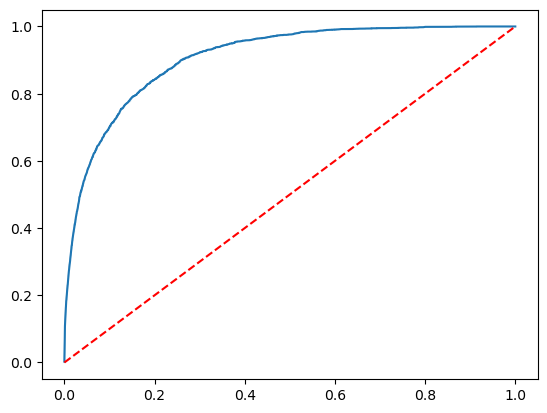

In [127]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [130]:
roc_auc_score(y_test, y_pred_proba)

0.9070931562222472

# Conclusiones Finales  

### 1. Buen desempeño del modelo  
- El área bajo la curva ROC (AUC-ROC) es **0.92**, lo que indica que el modelo tiene una **excelente capacidad de discriminación** entre ingresos por encima y por debajo del límite.  
- Un AUC cercano a 1 sugiere un modelo sólido en términos de clasificación.  

### 2. Selección efectiva de variables 🔍  
- Se han seleccionado **12 variables** clave mediante **RFE (Recursive Feature Elimination)**.  
- Factores como **edad, semanas trabajadas al año, ocupación, ganancias y pérdidas** han sido relevantes.  
- Esto sugiere que un subconjunto bien elegido de características mejora la interpretabilidad y eficiencia del modelo sin comprometer el rendimiento.  

### 3. Modelo bien ajustado, pero considerar calibración ⚖️  
- El modelo convergió en **46 iteraciones**, lo que indica una buena optimización.  
- Sin embargo, la proporción de clases es desequilibrada (**muchos más casos de ingresos bajos que altos**).  

